In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats

#### Let's read in the csv files generated off web scraped top 8 European soccer leagues.

In [244]:
Bundesliga = pd.read_csv("Bundesliga.csv")
EPL = pd.read_csv("EPL.csv")
Eredivisie = pd.read_csv("Eredivisie.csv")
LaLiga = pd.read_csv("LaLiga.csv")
Ligue1 = pd.read_csv("Ligue1.csv")
PLiga = pd.read_csv("PLiga.csv")
RPL = pd.read_csv("RPL.csv")
SerieA = pd.read_csv("SerieA.csv")

In [245]:
Bundesliga.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,15,Arminia,9,8,17,26,52,35,321,26,26.0,42.2,2021,BUNDESLIGA
1,13,Augsburg,10,6,18,36,54,36,353,25,27.0,41.3,2021,BUNDESLIGA
2,1,Bayern Munich,24,6,4,99,44,78,15,29,27.3,61.1,2021,BUNDESLIGA
3,3,Dortmund,20,4,10,75,46,64,"1,241",26,25.6,59.8,2021,BUNDESLIGA
4,5,Eint Frankfurt,16,12,6,69,53,60,853,25,27.2,54.0,2021,BUNDESLIGA


In [246]:
SerieA.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,3,Atalanta,23,9,6,90,47,78,105,30,27.3,54.9,2021,SERIE A
1,18,Benevento,7,12,19,40,75,33,158,29,28.7,42.3,2021,SERIE A
2,12,Bologna,10,11,17,51,65,41,105,37,27.2,50.9,2021,SERIE A
3,16,Cagliari,9,10,19,43,59,37,105,32,26.5,44.6,2021,SERIE A
4,19,Crotone,6,5,27,45,92,23,53,31,27.8,46.4,2021,SERIE A


In [247]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    140 non-null    int64  
 1   TEAM    140 non-null    object 
 2   W       140 non-null    int64  
 3   D       140 non-null    int64  
 4   L       140 non-null    int64  
 5   GF      140 non-null    int64  
 6   GA      140 non-null    int64  
 7   PTS     140 non-null    int64  
 8   ATT     140 non-null    object 
 9   PL      140 non-null    int64  
 10  AGE     140 non-null    float64
 11  POSS    140 non-null    float64
 12  SEASON  140 non-null    int64  
 13  LEAGUE  140 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 15.4+ KB


In [248]:
UEFA_Leagues = pd.concat([Bundesliga, EPL, Eredivisie, LaLiga, Ligue1, PLiga, RPL, SerieA],\
                         ignore_index= True)

In [249]:
UEFA_Leagues.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,15,Arminia,9,8,17,26,52,35,321,26,26.0,42.2,2021,BUNDESLIGA
1,13,Augsburg,10,6,18,36,54,36,353,25,27.0,41.3,2021,BUNDESLIGA
2,1,Bayern Munich,24,6,4,99,44,78,15,29,27.3,61.1,2021,BUNDESLIGA
3,3,Dortmund,20,4,10,75,46,64,"1,241",26,25.6,59.8,2021,BUNDESLIGA
4,5,Eint Frankfurt,16,12,6,69,53,60,853,25,27.2,54.0,2021,BUNDESLIGA


In [250]:
UEFA_Leagues.tail()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
973,2,Roma,19,13,6,54,31,70,"40,135",32,28.0,57.3,2015,SERIE A
974,7,Sampdoria,13,17,8,48,42,56,"21,745",30,26.2,50.4,2015,SERIE A
975,12,Sassuolo,12,13,13,49,57,49,"12,831",27,27.0,47.0,2015,SERIE A
976,9,Torino,14,12,12,48,45,54,"16,689",31,28.1,49.2,2015,SERIE A
977,16,Udinese,10,11,17,43,56,41,"8,912",28,26.9,46.5,2015,SERIE A


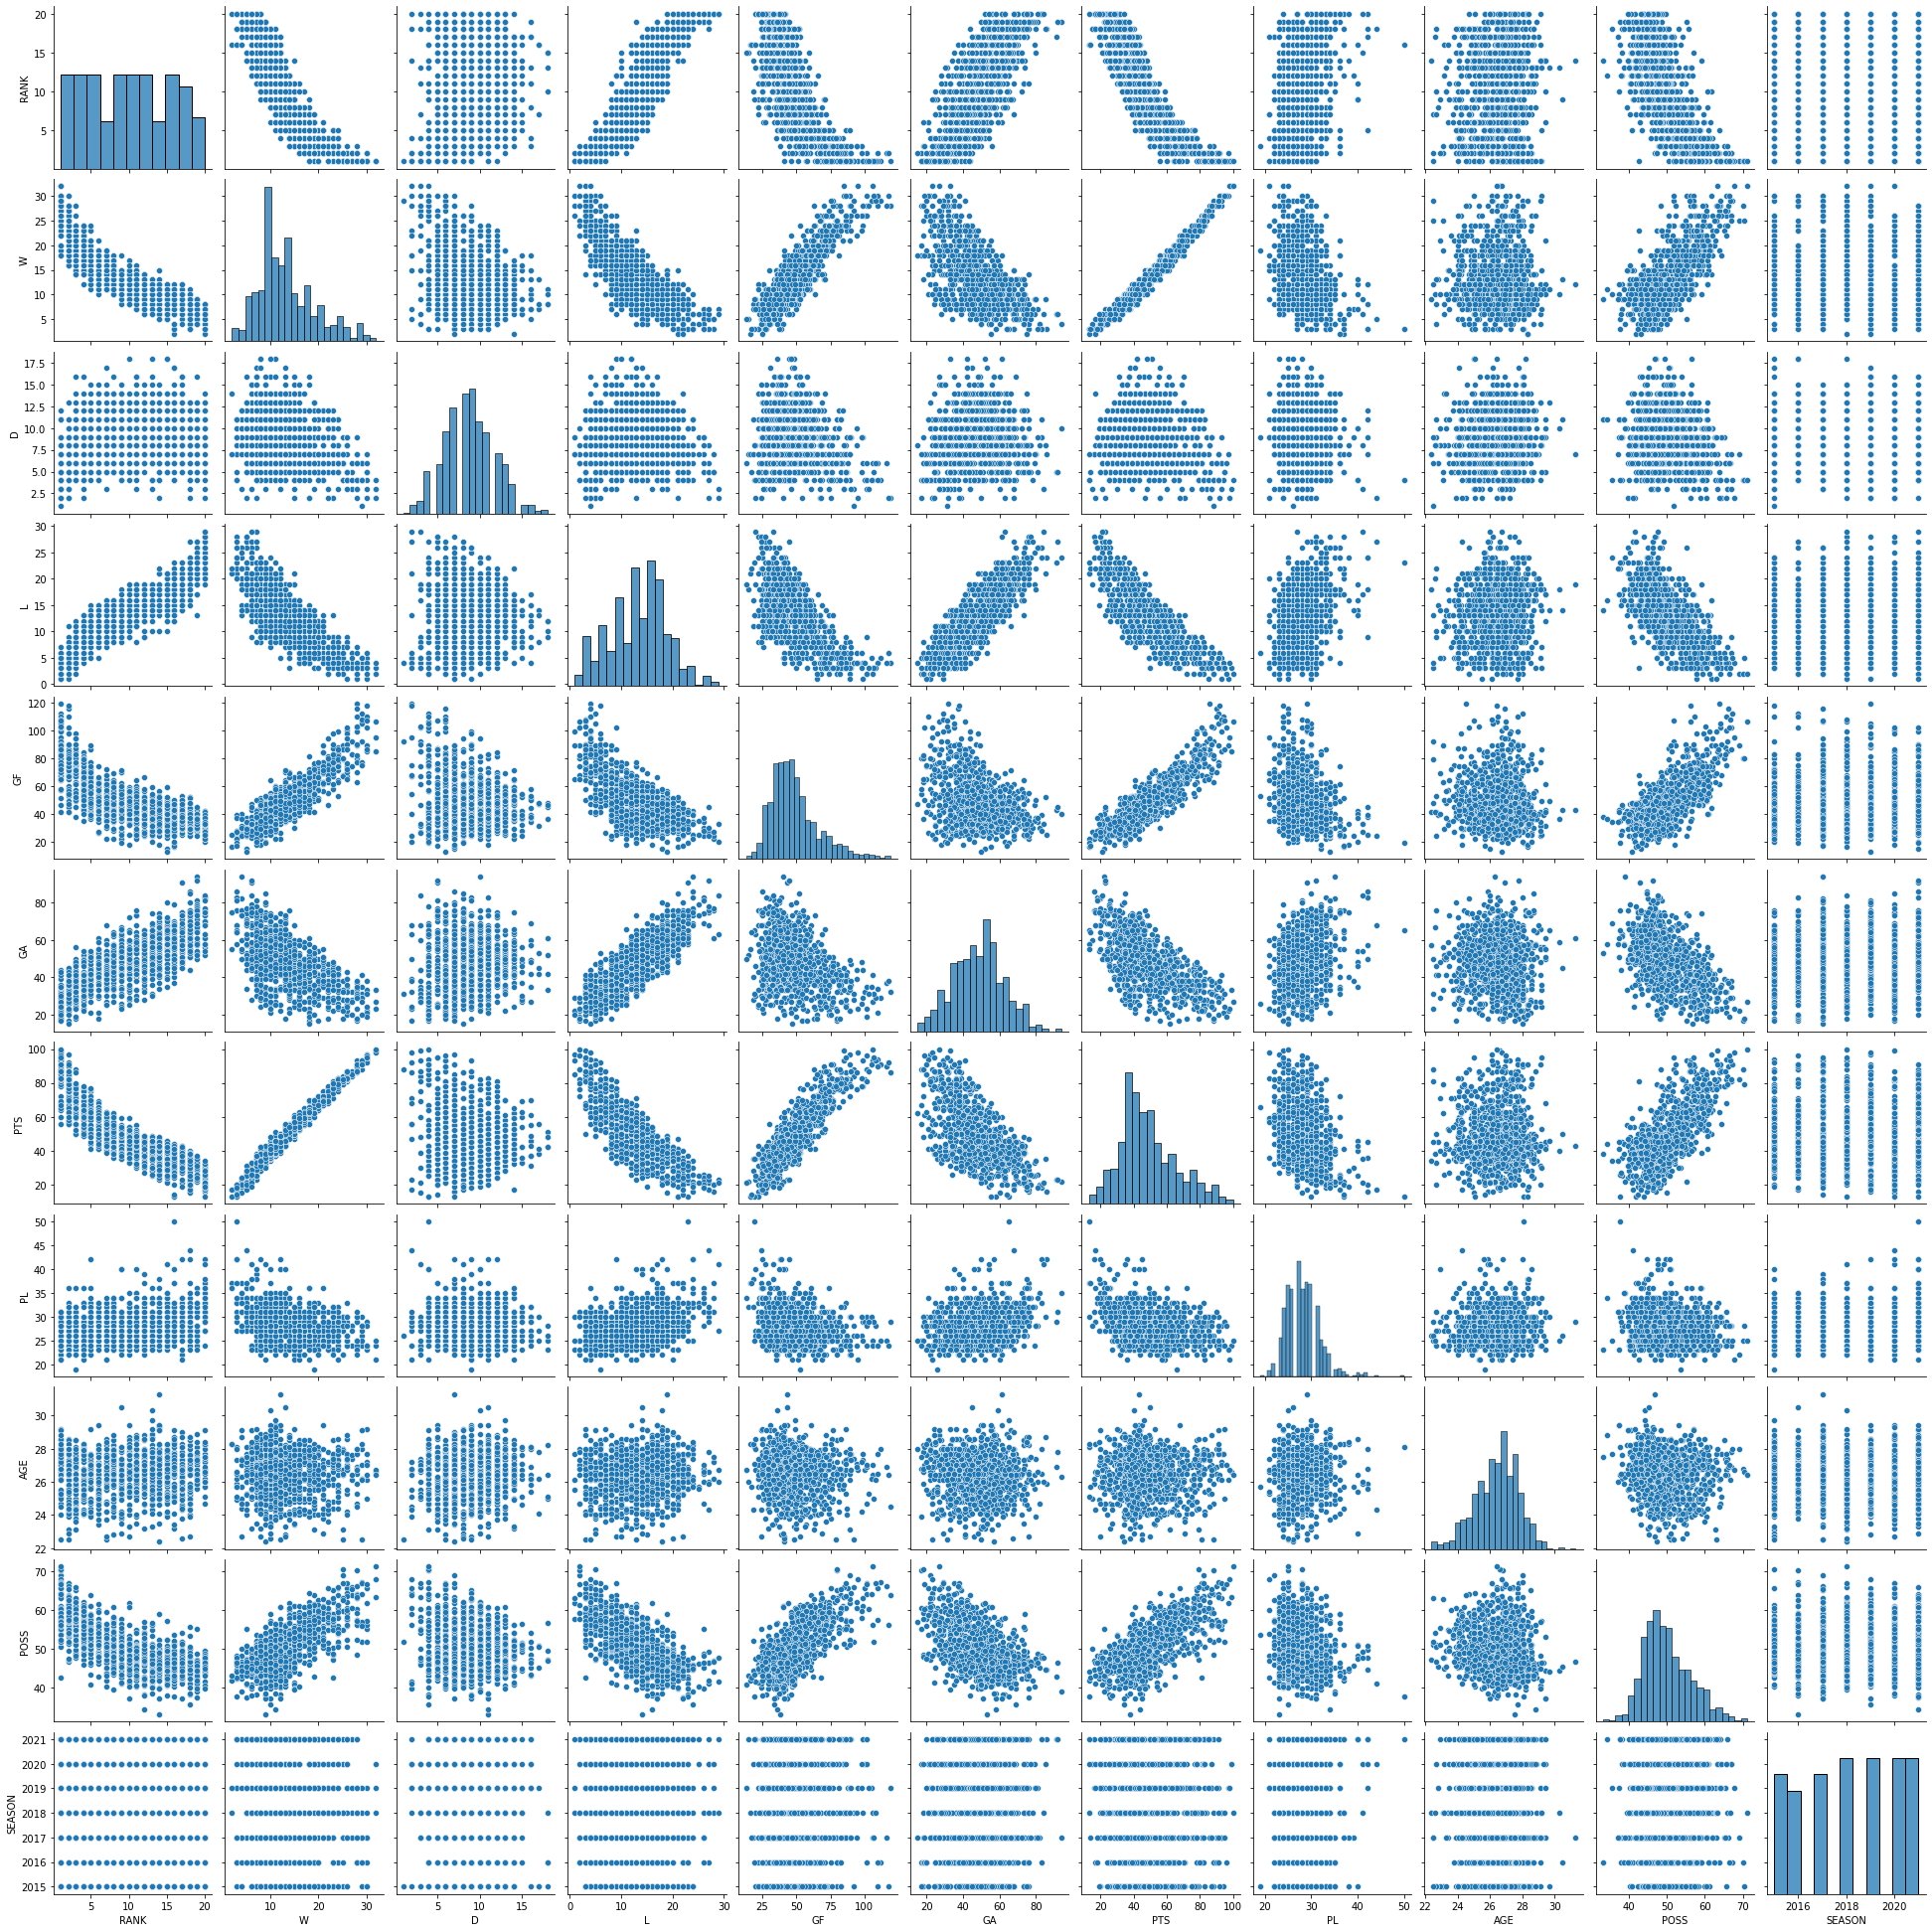

In [251]:
sns.pairplot(UEFA_Leagues);

#### As seen prior to the baseline modeling; DRAW (D), SQUAD SIZE (PL), SQUAD AGE (AGE) data does not appear to be correlated with POSSESSION RATIO (POSS). We will leave those columns out of the data to be analyzed for Linear Regression.

In [252]:
X, X_test, y, y_test = train_test_split(UEFA_Leagues[['RANK','W','L','GF','GA','PTS']],\
                                                    UEFA_Leagues['POSS'], test_size=0.20,\
                                                    random_state=42)

In [253]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

#### All UEFA_Leagues data is randomly split into 60% train, 20% validation and 20% test data sets. Let's start modeling using 60% train data.

In [254]:
x = X_tr
x = sm.add_constant(x)
y = y_tr
model = sm.OLS(y,x)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          1.92e-107
Time:                        18:56:09   Log-Likelihood:                -1635.2
No. Observations:                 586   AIC:                             3284.
Df Residuals:                     579   BIC:                             3315.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1618      1.867     27.941      0.000      48.495      55.828
RANK          -0.1729      0.091     -1.906      0.057      -0.351       0.005
W              0.3753      0.216      1.735      0.083      -0.050       0.800
L             -0.1195      0.111     -1.078      0.281      -0.337       0.098
GF             0.2238      0.027      8.247      0.000       0.171       0.277
GA            -0.0940      0.031     -3.082      0.002      -0.154      -0.034
PTS           -0.2065      0.073     -2.848      0.005      -0.349      -0.064
==============================================================================
Omnibus:                        5.638   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.587
Skew:                          -0.119   Prob(JB):                       0.0371
Kurtosis:                       3.462   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's see which feature(s) might be causing multicollinearity

In [255]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[129.91724852941692,
 9.289650844325658,
 60.16583213220193,
 13.706110826741835,
 8.262480371893757,
 6.524796163430423,
 56.10872135708681]

#### As seen in baseline modeling, WIN (W) and POINTS (PTS) data show strong multicollinearity. However, with the increase of our data set size, p-values are now much lower. Let's drop WIN data first and see what happens.

In [256]:
x = X_tr[['RANK','L','GF','GA','PTS']]
x = sm.add_constant(x)
y = y_tr
model = sm.OLS(y,x)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     162.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          6.36e-108
Time:                        18:56:09   Log-Likelihood:                -1636.7
No. Observations:                 586   AIC:                             3285.
Df Residuals:                     580   BIC:                             3312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9549      1.735     29.362      0.000      47.546      54.363
RANK          -0.2417      0.082     -2.956      0.003      -0.402      -0.081
L             -0.0011      0.087     -0.012      0.990      -0.173       0.171
GF             0.2417      0.025      9.617      0.000       0.192       0.291
GA            -0.1161      0.028     -4.185      0.000      -0.171      -0.062
PTS           -0.0936      0.032     -2.918      0.004      -0.157      -0.031
==============================================================================
Omnibus:                        5.242   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                6.038
Skew:                          -0.113   Prob(JB):                       0.0489
Kurtosis:                       3.443   Cond. No.                         921.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### COND NO value is below 1,000 now and we do not get the multicollinearity error anymore. Let's check our vif values once more.

In [257]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[111.87957173959765,
 7.517533053536917,
 8.50633034640553,
 7.064084093478195,
 5.382248617050457,
 10.942133300535048]

#### All of VIF values are still greater than 5. Let's drop the POINTS (PTS) column which has the highest VIF value.

In [258]:
x = X_tr[['RANK','L','GF','GA']]
x = sm.add_constant(x)
y = y_tr
model = sm.OLS(y,x)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     198.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.85e-107
Time:                        18:56:09   Log-Likelihood:                -1641.0
No. Observations:                 586   AIC:                             3292.
Df Residuals:                     581   BIC:                             3314.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.0532      1.113     42.258      0.000      44.866      49.240
RANK          -0.1509      0.076     -1.983      0.048      -0.300      -0.001
L             -0.0185      0.088     -0.211      0.833      -0.191       0.154
GF             0.1866      0.017     11.192      0.000       0.154       0.219
GA            -0.0888      0.026     -3.377      0.001      -0.140      -0.037
==============================================================================
Omnibus:                        7.003   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.940
Skew:                          -0.168   Prob(JB):                       0.0189
Kurtosis:                       3.461   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### COND NO significantly reduced however LOSS (L) variable continues to have a high p-value. Let's check how the VIF values are after PTS column is dropped.

In [259]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[45.46799107772212,
 6.429058750909954,
 8.466643441935593,
 3.067287795310837,
 4.766847445329437]

#### Two of our variables now have VIF values less than 5! LOSS (L) variable though continues to have the high p-value and the highest VIF value of concern. Let's drop LOSS (L).

In [260]:
x_train_out= X_tr[['RANK','GF','GA']]
x_train_out = sm.add_constant(x_train_out)
y_train_out= y_tr
model_train_out = sm.OLS(y_train_out,x_train_out)
UEFA_Leagues_train_out_model = model_train_out.fit()
UEFA_Leagues_train_out_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     265.4
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          1.65e-108
Time:                        18:56:09   Log-Likelihood:                -1641.0
No. Observations:                 586   AIC:                             3290.
Df Residuals:                     582   BIC:                             3307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9726      1.045     44.961      0.000      44.921      49.024
RANK          -0.1576      0.069     -2.283      0.023      -0.293      -0.022
GF             0.1880      0.015     12.343      0.000       0.158       0.218
GA            -0.0922      0.021     -4.498      0.000      -0.132      -0.052
==============================================================================
Omnibus:                        6.942   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.827
Skew:                          -0.169   Prob(JB):                       0.0200
Kurtosis:                       3.455   Cond. No.                         445.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are now below 0.05! Let's check VIF values one last time.

In [261]:
variables = model_train_out.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[40.09374620097993, 5.303287107885085, 2.564543232964124, 2.904251243070016]

#### RANK has a VIF slightly over 5 however we will keep it as RANK will play a key role establishing a team's success and communicating this level of success to the client.

#### Let's check some visuals to see if residuals are distributed normally.

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


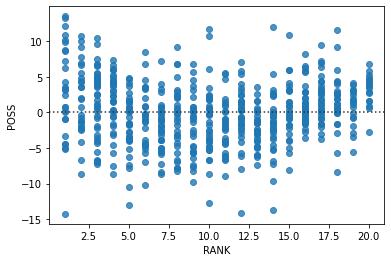

In [262]:
sns.residplot(X_tr.RANK,y_tr, data = UEFA_Leagues);

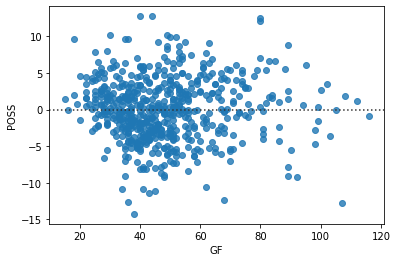

In [263]:
sns.residplot(X_tr.GF,y_tr, data = UEFA_Leagues);

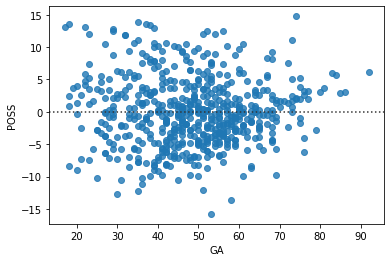

In [264]:
sns.residplot(X_tr.GA,y_tr, data = UEFA_Leagues);

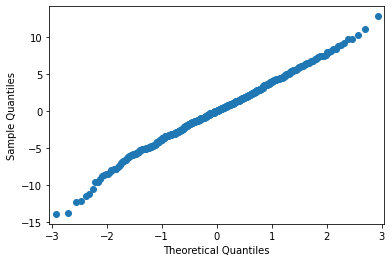

In [265]:
data = sm.datasets.longley.load()
model = sm.OLS(y, x)
fit  = model.fit()
res = fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### QQ plot shows that are residuals are normally distributed. Now, let's fit regression lines to our variables:

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


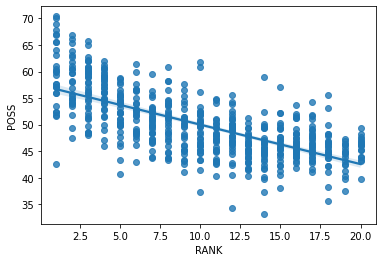

In [266]:
sns.regplot(X_tr.RANK,y_tr, robust = True);

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


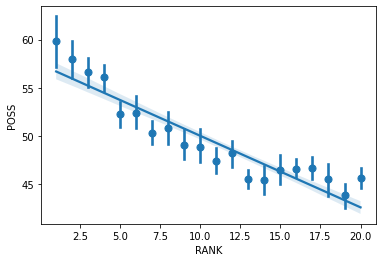

In [267]:
sns.regplot(X_tr.RANK,y_tr, x_estimator=np.mean, robust = True);

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


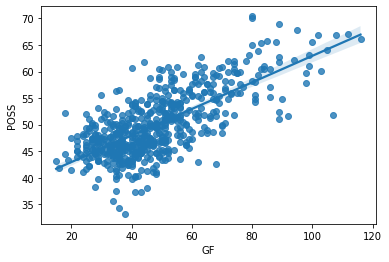

In [268]:
sns.regplot(X_tr.GF,y_tr, data = UEFA_Leagues);

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


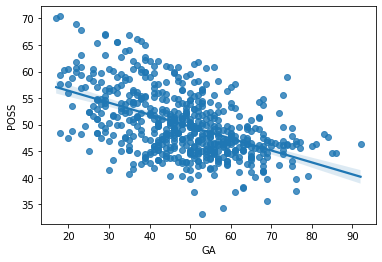

In [269]:
sns.regplot(X_tr.GA,y_tr, data = UEFA_Leagues);

#### Let's score our validation set using the model:

In [270]:
x_val_out = X_val[['RANK','GF','GA']]
x_val_out = sm.add_constant(x_val_out)
y_val_out = y_val
model_val_out = sm.OLS(y_val_out,x_val_out)
UEFA_Leagues_val_out_model = model_val_out.fit()
UEFA_Leagues_val_out_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.08e-42
Time:                        18:56:31   Log-Likelihood:                -537.45
No. Observations:                 196   AIC:                             1083.
Df Residuals:                     192   BIC:                             1096.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4561      1.753     28.205      0.000      45.998      52.915
RANK          -0.3782      0.105     -3.608      0.000      -0.585      -0.171
GF             0.1490      0.023      6.575      0.000       0.104       0.194
GA            -0.0547      0.033     -1.636      0.104      -0.121       0.011
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.295
Skew:                           0.146   Prob(JB):                        0.317
Kurtosis:                       3.442   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


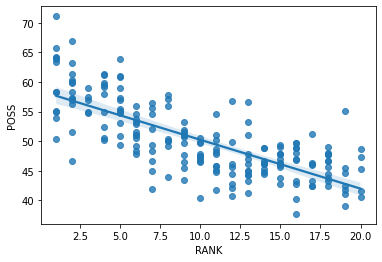

In [271]:
sns.regplot(X_val.RANK,y_val, robust = True);

#### GOALS AGAINST (GA) variable has a high p-value for the validation set. Let's drop it and rescore the remaining data set:

In [201]:
x = X_val[['RANK','GF']]
x = sm.add_constant(x)
y = y_val
model = sm.OLS(y,x)
UEFA_Leagues_val_model = model.fit()
UEFA_Leagues_val_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     167.0
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.91e-43
Time:                        15:07:36   Log-Likelihood:                -538.81
No. Observations:                 196   AIC:                             1084.
Df Residuals:                     193   BIC:                             1093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.5693      1.675     29.001      0.000      45.266      51.872
RANK          -0.5050      0.071     -7.128      0.000      -0.645      -0.365
GF             0.1378      0.022      6.350      0.000       0.095       0.181
==============================================================================
Omnibus:                        1.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.406
Skew:                           0.087   Prob(JB):                        0.495
Kurtosis:                       3.377   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing the GA variable did not improve Adj R^2 value, perhaps it is better to keep it in the model as it did not have a high p-value in the train model.

#### R^2 = 0.639 achieved via scoring the validation set is greater than R^2 = 0.578 achieved via scoring the training set. This score validates our model and also points out to the presence of outlier data. Let's check our z-scores for our features and target values.

In [202]:
UEFA_Leagues_z_scores= UEFA_Leagues[["RANK","GF","GA","POSS"]].apply(stats.zscore)
UEFA_Leagues_z_scores_3 = UEFA_Leagues_z_scores[(UEFA_Leagues_z_scores["RANK"]>3) |\
                                                (UEFA_Leagues_z_scores["GF"]>3) |\
                                                (UEFA_Leagues_z_scores["GA"]>3) |\
                                                (UEFA_Leagues_z_scores["POSS"]>3)]
UEFA_Leagues_z_scores_3

,RANK,GF,GA,POSS
73,-1.625482,2.319985,-1.909238,3.083608
91,-1.625482,1.805303,-2.270405,3.262538
109,-1.625482,1.805303,-2.198172,3.311337
156,-1.444027,3.063414,-0.970203,2.742014
196,-1.625482,3.292161,-1.548071,3.425202
268,-1.625482,3.063414,-1.837005,2.270290
280,1.277787,-0.310610,3.074870,-1.161914
304,-1.625482,4.035590,-1.186904,2.237757
457,-1.444027,3.864030,-0.825736,2.611883
467,1.640695,-0.482170,3.291571,-1.796303


#### There are 21 variables with z-scores greater than 3. We will drop those to see if the underfitting we have experienced in our training model will improve.

In [203]:
UEFA_Leagues = UEFA_Leagues.drop(UEFA_Leagues_z_scores[(UEFA_Leagues_z_scores["RANK"]>3) |\
                                                    (UEFA_Leagues_z_scores["GF"]>3) |\
                                                    (UEFA_Leagues_z_scores["GA"]>3) |\
                                                    (UEFA_Leagues_z_scores["POSS"]>3)].index)
UEFA_Leagues

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,15,Arminia,9,8,17,26,52,35,321,26,26.0,42.2,2021,BUNDESLIGA
1,13,Augsburg,10,6,18,36,54,36,353,25,27.0,41.3,2021,BUNDESLIGA
2,1,Bayern Munich,24,6,4,99,44,78,15,29,27.3,61.1,2021,BUNDESLIGA
3,3,Dortmund,20,4,10,75,46,64,"1,241",26,25.6,59.8,2021,BUNDESLIGA
4,5,Eint Frankfurt,16,12,6,69,53,60,853,25,27.2,54.0,2021,BUNDESLIGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2,Roma,19,13,6,54,31,70,"40,135",32,28.0,57.3,2015,SERIE A
974,7,Sampdoria,13,17,8,48,42,56,"21,745",30,26.2,50.4,2015,SERIE A
975,12,Sassuolo,12,13,13,49,57,49,"12,831",27,27.0,47.0,2015,SERIE A
976,9,Torino,14,12,12,48,45,54,"16,689",31,28.1,49.2,2015,SERIE A


#### We will rerun data splitting and modeling without the outlier data:

In [204]:
X, X_test, y, y_test = train_test_split(UEFA_Leagues[['RANK','GF','GA']],\
                                                    UEFA_Leagues['POSS'], test_size=0.20,\
                                                    random_state=42)

In [205]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [206]:
x_train = X_tr
x_train = sm.add_constant(x_train)
y_train = y_tr
model_tr = sm.OLS(y_train,x_train)
UEFA_Leagues_train_model = model_tr.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     215.5
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.24e-93
Time:                        15:07:36   Log-Likelihood:                -1603.1
No. Observations:                 573   AIC:                             3214.
Df Residuals:                     569   BIC:                             3232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5085      1.097     42.410      0.000      44.355      48.662
RANK          -0.1876      0.072     -2.593      0.010      -0.330      -0.045
GF             0.1887      0.017     10.794      0.000       0.154       0.223
GA            -0.0736      0.021     -3.444      0.001      -0.116      -0.032
==============================================================================
Omnibus:                        3.422   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.393
Skew:                          -0.121   Prob(JB):                        0.183
Kurtosis:                       3.289   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Our R^2 has decreased from .578 to .532 for the training data after outlier data clean-up. Let's score our validation set.

In [207]:
x_valid = X_val[['RANK','GF','GA']]
x_valid = sm.add_constant(x_valid)
y_valid = y_val
model_val = sm.OLS(y_valid,x_valid)
UEFA_Leagues_val_model = model_val.fit()
UEFA_Leagues_val_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     95.35
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.50e-37
Time:                        15:07:36   Log-Likelihood:                -532.10
No. Observations:                 192   AIC:                             1072.
Df Residuals:                     188   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2994      2.001     23.637      0.000      43.352      51.247
RANK          -0.1627      0.123     -1.326      0.186      -0.405       0.079
GF             0.2081      0.032      6.554      0.000       0.145       0.271
GA            -0.1203      0.036     -3.331      0.001      -0.191      -0.049
==============================================================================
Omnibus:                        5.422   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.830
Skew:                          -0.251   Prob(JB):                       0.0542
Kurtosis:                       3.691   Cond. No.                         495.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R^2 value for the validation data has also decreased from .639 to .603 after outlier data clean up. 

#### Let's check other metrics for model performance to see if our data set has large residuals

In [208]:
residuals = UEFA_Leagues_train_model.predict(x_train) - y_train
rmse_train = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse_train)

3.9699920567592364


In [209]:
mae_train = sum(abs(UEFA_Leagues_train_model.predict(x_train) - y_train))/len(y_train)
print(mae_train)


3.129234359888432


#### Let's check RMSE and MAE for validation data now

In [210]:
residuals = UEFA_Leagues_val_model.predict(x_valid) - y_valid
rmse_val = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse_val)

3.8666654107476486


In [211]:
mae_val = sum(abs(UEFA_Leagues_val_model.predict(x_valid) - y_valid))/len(y_valid)
print(mae_val)

2.9297507971172743


#### Now, let's check RMSE and MAE values for training and validation data sets prior to outlier data removal

In [212]:
residuals = UEFA_Leagues_train_out_model.predict(x_train_out) - y_train_out
rmse_train_out = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse_train_out)

3.980405681042878


* RMSE decreases to 3.97 after outlier data removal

In [213]:
mae_train_out = sum(abs(UEFA_Leagues_train_out_model.predict(x_train_out) - y_train_out))/\
len(y_train_out)
print(mae_train_out)

3.101864176136542


* MAE increases to 3.13 after outlier data removal

In [214]:
residuals = UEFA_Leagues_val_out_model.predict(x_val_out) - y_val_out
rmse_val_out = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse_val_out)

3.7553384893245405


* RMSE increases to 3.87 after outlier data removal.

In [215]:
mae_val_out = sum(abs(UEFA_Leagues_val_out_model.predict(x_val_out) - y_val_out))/\
len(y_val_out)
print(mae_val_out)

2.921192837981948


* MAE increases to 2.93 after outlier data removal

#### We are getting mixed results with RMSE and MAE checks, dropping the outlier data impacted the train and validation sets differently. MAE increases in both sets which suggests that the model is not getting better at fitting the data as backed up by the decrease in R^2 value in both training and validation sets. Perhaps we should reduce our threshold to 2.5 for outlier data and try one last time.

In [216]:
UEFA_Leagues_2 = pd.concat([Bundesliga, EPL, Eredivisie, LaLiga, Ligue1, PLiga, RPL, SerieA], ignore_index= True)

In [217]:
UEFA_Leagues_z_scores_2= UEFA_Leagues_2[["RANK","GF","GA","POSS"]].apply(stats.zscore)
UEFA_Leagues_z_scores_N = UEFA_Leagues_z_scores_2[(UEFA_Leagues_z_scores_2["RANK"]>2.5) |\
                                                (UEFA_Leagues_z_scores_2["GF"]>2.5) |\
                                                (UEFA_Leagues_z_scores_2["GA"]>2.5) |\
                                                (UEFA_Leagues_z_scores_2["POSS"]>2.5)]
UEFA_Leagues_z_scores_N

,RANK,GF,GA,POSS
2,-1.625482,2.891853,-0.320102,1.798565
13,1.459241,-1.339973,2.713703,-0.885386
19,-1.625482,2.949040,-1.186904,2.530552
37,-1.625482,2.262798,-1.186904,2.514285
55,-1.625482,2.491545,-1.475837,2.579351
73,-1.625482,2.319985,-1.909238,3.083608
91,-1.625482,1.805303,-2.270405,3.262538
109,-1.625482,1.805303,-2.198172,3.311337
156,-1.444027,3.063414,-0.970203,2.742014
178,-1.625482,2.663106,-1.837005,2.888412


In [218]:
len(UEFA_Leagues_z_scores_N)

37

In [223]:
UEFA_Leagues_2 = UEFA_Leagues_2.drop(UEFA_Leagues_z_scores_2\
                                                 [(UEFA_Leagues_z_scores_2["RANK"]>2.5) |\
                                                    (UEFA_Leagues_z_scores_2["GF"]>2.5) |\
                                                    (UEFA_Leagues_z_scores_2["GA"]>2.5) |\
                                            (UEFA_Leagues_z_scores_2["POSS"]>2.5)].index)
UEFA_Leagues_2

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,15,Arminia,9,8,17,26,52,35,321,26,26.0,42.2,2021,BUNDESLIGA
1,13,Augsburg,10,6,18,36,54,36,353,25,27.0,41.3,2021,BUNDESLIGA
3,3,Dortmund,20,4,10,75,46,64,"1,241",26,25.6,59.8,2021,BUNDESLIGA
4,5,Eint Frankfurt,16,12,6,69,53,60,853,25,27.2,54.0,2021,BUNDESLIGA
5,10,Freiburg,12,9,13,52,52,45,188,24,26.2,47.0,2021,BUNDESLIGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2,Roma,19,13,6,54,31,70,"40,135",32,28.0,57.3,2015,SERIE A
974,7,Sampdoria,13,17,8,48,42,56,"21,745",30,26.2,50.4,2015,SERIE A
975,12,Sassuolo,12,13,13,49,57,49,"12,831",27,27.0,47.0,2015,SERIE A
976,9,Torino,14,12,12,48,45,54,"16,689",31,28.1,49.2,2015,SERIE A


In [224]:
W, W_test, z, z_test = train_test_split(UEFA_Leagues_2[['RANK','GF','GA']],\
                                                    UEFA_Leagues_2['POSS'], test_size=0.20,\
                                                    random_state=42)

In [225]:
W_tr, W_val, z_tr, z_val = train_test_split(W, z, test_size=0.25, random_state=42)

In [226]:
w = W_tr
w= sm.add_constant(w)
z = z_tr
model_tr_2 = sm.OLS(z,w)
UEFA_Leagues_2_train_model = model_tr_2.fit()
UEFA_Leagues_2_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.09e-82
Time:                        15:17:04   Log-Likelihood:                -1572.0
No. Observations:                 564   AIC:                             3152.
Df Residuals:                     560   BIC:                             3169.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.1018      1.086     44.275      0.000      45.968      50.236
RANK          -0.2418      0.072     -3.352      0.001      -0.384      -0.100
GF             0.1567      0.018      8.762      0.000       0.122       0.192
GA            -0.0717      0.022     -3.312      0.001      -0.114      -0.029
==============================================================================
Omnibus:                        3.028   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                3.159
Skew:                          -0.075   Prob(JB):                        0.206
Kurtosis:                       3.334   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Reducing the z-score threshold to 2.5 and removing a greater number of data with high residuals did actually reduce the R^2 value to its lowest we have seen. (R^2 = .495) Therefore we will not remove any outlier data from our data set.  We will continue to score our test data and conclude our modeling.

In [227]:
UEFA_Leagues = pd.concat([Bundesliga, EPL, Eredivisie, LaLiga, Ligue1, PLiga, RPL, SerieA],\
                         ignore_index= True)

In [228]:
X, X_test, y, y_test = train_test_split(UEFA_Leagues[['RANK','W','L','GF','GA','PTS']],\
                                                    UEFA_Leagues['POSS'], test_size=0.20,\
                                                    random_state=42)

In [229]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [230]:
x = X_test[['RANK','GF','GA']]
x = sm.add_constant(x)
y = y_test
test_model = sm.OLS(y,x)
UEFA_Leagues_test_model = test_model.fit()
UEFA_Leagues_test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     93.54
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.39e-37
Time:                        15:27:38   Log-Likelihood:                -544.44
No. Observations:                 196   AIC:                             1097.
Df Residuals:                     192   BIC:                             1110.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5376      1.781     26.135      0.000      43.025      50.050
RANK          -0.0196      0.121     -0.162      0.871      -0.258       0.219
GF             0.2102      0.028      7.632      0.000       0.156       0.265
GA            -0.1379      0.032     -4.266      0.000      -0.202      -0.074
==============================================================================
Omnibus:                        4.876   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.528
Skew:                          -0.310   Prob(JB):                        0.104
Kurtosis:                       2.587   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


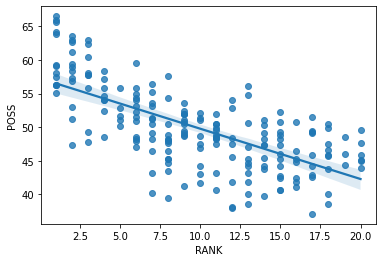

In [232]:
sns.regplot(X_test.RANK,y_test,robust = True);

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


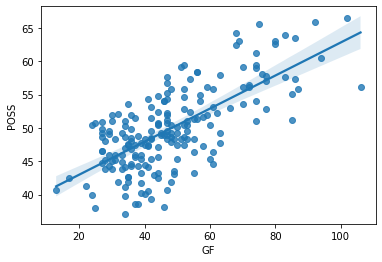

In [234]:
sns.regplot(X_test.GF,y_test,robust = True);

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


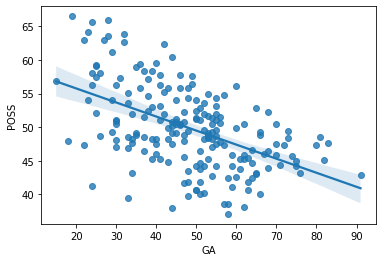

In [235]:
sns.regplot(X_test.GA,y_test,robust = True);

#### In conclusion, the model's R^2 test score .594 ended up being slightly over the training data R^2 score .578 BUT lower than the validation data R^2 .639.

#### Let's see what kind of results skLearn package will produce:

In [238]:
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)
train_score = lr_model.score(X_tr, y_tr)
print('\nTraining R^2 score was:', train_score)
val_score = lr_model.score(X_val, y_val)
print('\nValidation R^2 score was:', val_score)


Training R^2 score was: 0.5860122761342551

Validation R^2 score was: 0.6202551217240031


#### skLearn produced similar results to Statsmodels package which also validates our model.